Import and merge the three CSVs here. Remove redundant columns when merging.

- summary1: do_clustering and sigmaG off, peak and pred_line individually activated
- summary2: do_clustering and sigmaG off, peak and pred_line activated together
- summary3: do_clustering and sigmaG on, peak and pred_line off

The results were generated from the respective `.py` files and use a 7 GB work unit.

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.read_csv("./summary1.csv")
df2 = pd.read_csv("./summary2.csv")
df3 = pd.read_csv("./summary3.csv")

different_cols = df2.columns.difference(df1.columns)
df = pd.merge(df1, df2[different_cols], left_index=True,
                     right_index=True, how='inner')

different_cols = df3.columns.difference(df.columns)
df = pd.merge(df, df3[different_cols], left_index=True,
                     right_index=True, how='inner')
df["oid"] = df["oid"].astype(int)
df

,oid,total_num_results,num_results_no_filter,check_results_no_filter,num_results_peak,check_results_peak,num_results_pred,check_results_pred,mean_dx,max_dx,...,min_dx_diff,mean_dy,max_dy,min_dy,max_dy_diff,min_dy_diff,check_results_both,num_results_both,check_results_siG_clust,num_results_siG_clust
0,204287,70.0,126.0,2.0,97.0,2.0,29.0,1.0,0.389805,0.408547,...,-0.004608,-0.124741,-0.123655,-0.130312,0.001086,-0.005571,1.0,25.0,1.0,9.0
1,489097,70.0,93.0,0.0,NaN,NaN,NaN,NaN,0.475586,0.498555,...,-0.005724,-0.283809,-0.281244,-0.296606,0.002565,-0.012797,NaN,NaN,NaN,NaN
2,587985,60.0,104.0,0.0,NaN,NaN,NaN,NaN,0.365722,0.371455,...,-0.003806,-0.139138,-0.138050,-0.140847,0.001088,-0.001709,NaN,NaN,NaN,NaN
3,601439,70.0,125.0,1.0,76.0,1.0,28.0,0.0,0.501255,0.525476,...,-0.006044,-0.189624,-0.187960,-0.198108,0.001664,-0.008484,0.0,18.0,1.0,7.0
4,1533755,70.0,115.0,0.0,NaN,NaN,NaN,NaN,0.562284,0.589413,...,-0.006739,-0.193693,-0.192002,-0.202349,0.001691,-0.008655,NaN,NaN,NaN,NaN
5,1668438,70.0,140.0,0.0,NaN,NaN,NaN,NaN,0.350604,0.367536,...,-0.004219,-0.197514,-0.195733,-0.206416,0.001782,-0.008901,NaN,NaN,NaN,NaN
6,2674005,70.0,121.0,1.0,52.0,1.0,23.0,1.0,0.562508,0.589700,...,-0.006794,-0.354912,-0.351697,-0.370924,0.003215,-0.016013,1.0,14.0,1.0,7.0
7,2706546,70.0,139.0,1.0,114.0,1.0,29.0,1.0,0.317840,0.333153,...,-0.003787,-0.128587,-0.127449,-0.134353,0.001138,-0.005766,1.0,27.0,0.0,13.0
8,2820143,70.0,173.0,0.0,NaN,NaN,NaN,NaN,0.237469,0.248909,...,-0.002829,-0.104412,-0.103483,-0.109100,0.000929,-0.004688,NaN,NaN,NaN,NaN
9,3581634,70.0,142.0,0.0,NaN,NaN,NaN,NaN,0.319757,0.335184,...,-0.003832,-0.160851,-0.159408,-0.168088,0.001442,-0.007238,NaN,NaN,NaN,NaN


Restrict to rows which contain detectable objects; if zero things with that oid were receovered even before applying any filters, then there's no hope of recovering it after applying the filters.

In [36]:
df_detectable = df[df["check_results_no_filter"] > 0]
df_detectable

,oid,total_num_results,num_results_no_filter,check_results_no_filter,num_results_peak,check_results_peak,num_results_pred,check_results_pred,mean_dx,max_dx,...,min_dx_diff,mean_dy,max_dy,min_dy,max_dy_diff,min_dy_diff,check_results_both,num_results_both,check_results_siG_clust,num_results_siG_clust
0,204287,70.0,126.0,2.0,97.0,2.0,29.0,1.0,0.389805,0.408547,...,-0.004608,-0.124741,-0.123655,-0.130312,0.001086,-0.005571,1.0,25.0,1.0,9.0
3,601439,70.0,125.0,1.0,76.0,1.0,28.0,0.0,0.501255,0.525476,...,-0.006044,-0.189624,-0.187960,-0.198108,0.001664,-0.008484,0.0,18.0,1.0,7.0
6,2674005,70.0,121.0,1.0,52.0,1.0,23.0,1.0,0.562508,0.589700,...,-0.006794,-0.354912,-0.351697,-0.370924,0.003215,-0.016013,1.0,14.0,1.0,7.0
7,2706546,70.0,139.0,1.0,114.0,1.0,29.0,1.0,0.317840,0.333153,...,-0.003787,-0.128587,-0.127449,-0.134353,0.001138,-0.005766,1.0,27.0,0.0,13.0
11,4429299,140.0,122.0,2.0,92.0,2.0,30.0,1.0,0.106172,0.958740,...,-0.849613,-0.055809,1.748079,-1.860686,1.803888,-1.804877,1.0,26.0,1.0,16.0
14,4811755,70.0,100.0,1.0,68.0,1.0,21.0,1.0,0.418110,0.438317,...,-0.005044,-0.245194,-0.242980,-0.256247,0.002214,-0.011053,1.0,17.0,1.0,7.0
15,4933291,70.0,140.0,1.0,110.0,1.0,27.0,1.0,0.348092,0.364823,...,-0.004109,-0.117683,-0.116651,-0.122947,0.001032,-0.005264,1.0,27.0,1.0,12.0
16,5618119,70.0,150.0,2.0,125.0,2.0,32.0,1.0,0.046420,0.048647,...,-0.000543,-0.019705,-0.019529,-0.020591,0.000176,-0.000886,1.0,28.0,1.0,21.0
18,6064460,70.0,164.0,1.0,76.0,1.0,29.0,1.0,1.909671,2.000412,...,-0.021528,-0.343801,-0.340906,-0.359025,0.002896,-0.015224,1.0,17.0,1.0,2.0
20,6382090,70.0,154.0,2.0,131.0,2.0,33.0,1.0,0.045385,0.047559,...,-0.000529,-0.018427,-0.018263,-0.019255,0.000164,-0.000828,1.0,30.0,0.0,21.0


Get the `num_results_*` columns only which give the total number of results after applying KBMOD and specified filters.

In [37]:
num_results_colnames = ["oid"] + [s for s in df_detectable.columns if "num_results_" in s]
df_detectable_num_results = df_detectable[num_results_colnames]
df_detectable_num_results

,oid,num_results_no_filter,num_results_peak,num_results_pred,num_results_both,num_results_siG_clust
0,204287,126.0,97.0,29.0,25.0,9.0
3,601439,125.0,76.0,28.0,18.0,7.0
6,2674005,121.0,52.0,23.0,14.0,7.0
7,2706546,139.0,114.0,29.0,27.0,13.0
11,4429299,122.0,92.0,30.0,26.0,16.0
14,4811755,100.0,68.0,21.0,17.0,7.0
15,4933291,140.0,110.0,27.0,27.0,12.0
16,5618119,150.0,125.0,32.0,28.0,21.0
18,6064460,164.0,76.0,29.0,17.0,2.0
20,6382090,154.0,131.0,33.0,30.0,21.0


<Axes: xlabel='oid'>

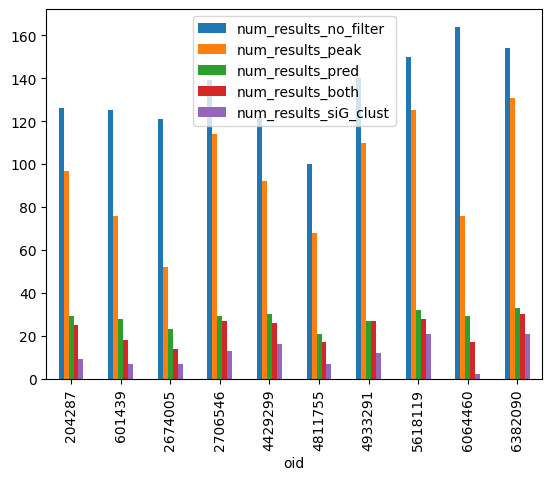

In [38]:
# for i in range(len(df_detectable_num_results)):
#   df_detectable_num_results.iloc[i].plot(kind='bar',
#                                          title=f"Number of results for {int(df_detectable["oid"].iloc[i])}")
#   plt.show()
df_detectable_num_results.plot.bar(x="oid")

Get the `check_results_*` columns only which give the number of results matching that oid and allow us to establish if the object was recovered or not (`> 0` means object was recovered).

In [42]:
check_colnames = ["oid"] + [s for s in df_detectable.columns if "check" in s]
df_detectable_check = df_detectable[check_colnames]
df_detectable_check

,oid,check_results_no_filter,check_results_peak,check_results_pred,check_results_both,check_results_siG_clust
0,204287,2.0,2.0,1.0,1.0,1.0
3,601439,1.0,1.0,0.0,0.0,1.0
6,2674005,1.0,1.0,1.0,1.0,1.0
7,2706546,1.0,1.0,1.0,1.0,0.0
11,4429299,2.0,2.0,1.0,1.0,1.0
14,4811755,1.0,1.0,1.0,1.0,1.0
15,4933291,1.0,1.0,1.0,1.0,1.0
16,5618119,2.0,2.0,1.0,1.0,1.0
18,6064460,1.0,1.0,1.0,1.0,1.0
20,6382090,2.0,2.0,1.0,1.0,0.0


`True/False` to indicate whether object recovered or not.

In [45]:
df_detectable_check_summary = df_detectable_check > 0
df_detectable_check_summary["oid"] = df_detectable["oid"]
df_detectable_check_summary

,oid,check_results_no_filter,check_results_peak,check_results_pred,check_results_both,check_results_siG_clust
0,204287,True,True,True,True,True
3,601439,True,True,False,False,True
6,2674005,True,True,True,True,True
7,2706546,True,True,True,True,False
11,4429299,True,True,True,True,True
14,4811755,True,True,True,True,True
15,4933291,True,True,True,True,True
16,5618119,True,True,True,True,True
18,6064460,True,True,True,True,True
20,6382090,True,True,True,True,False
